# Basic Description Statistic

In [1]:
import pandas as pd
df = pd.read_csv('F:\Data_Scrapping\The-Daily-Star-Sentiment\daily_star\home_page_with_clean_data.csv')
df

,Unnamed: 0,title,Link,strong,body
0,0,Rumours of secret stash incited Gulshan mob: C...,https://www.thedailystar.net/news/bangladesh/n...,Preliminary investigation into the attempted l...,This misinformation prompted a group of 20-25 ...
1,1,CR Abrar sworn in as adviser,https://www.thedailystar.net/news/bangladesh/n...,"CR Abrar, a migration expert and former profes...",President Mohammed Shahbuddin administered him...
2,2,Bangladesh booters off to Saudi Arabia camp,https://www.thedailystar.net/sports/football/n...,A 38-member contingent of the Bangladesh natio...,The contingent consists of 28 players and 10 o...
3,3,Memories across borders: The Bangladesh connec...,https://www.thedailystar.net/sports/cricket/ch...,It was a bustling day at Lahore's Gaddafi Stad...,"With heightened security in place, some of the..."
4,4,Gazipur JCD men sued over assault on students,https://www.thedailystar.net/news/bangladesh/c...,,A case has been filed against several leaders ...
...,...,...,...,...,...
72,72,"Price hike of essentials: Poor, middle class i...",https://www.thedailystar.net/health/food/price...,,"Harunur Rashid, a retired government employee,..."
73,73,"Public medical colleges: 86 doctors, 136 stude...",https://www.thedailystar.net/news/bangladesh/c...,,"Over the last two months, at least 86 physicia..."
74,74,"Is smoking the problem, or that women are doin...",https://www.thedailystar.net/opinion/views/new...,Naziba Basher Naziba Basher,A leisurely chat over a cup of tea and a quick...
75,75,USAID fund cut: Job losses shock development w...,https://www.thedailystar.net/news/bangladesh/n...,Saiful Alam (not his real name) built his care...,"But now, at 47, he faces a harsh reality he ne..."


In [9]:
# article length
df['article_length'] = df['body'].apply(lambda x: len(x.split()))
print(df['article_length'].max())
print(df['article_length'].min())
print(df['article_length'].mean())


4703
73
1120.6493506493507


In [10]:
# most Frequent words
from collections import Counter
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)
def remove_links(text):
    return re.sub(r'http\S+','',text)
def remove_numbers(text):
    return re.sub(r'\d+','',text)
def remove_html(text):
    return re.sub(r'<.*?>','',text)
def remove_newline(text):
    return re.sub(r'\n',' ',text)
def remove_single_char(text):
    return re.sub(r'\b\w\b','',text)
def remove_extra_space(text):
    return re.sub(r'\s+',' ',text)
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+',' ',text)
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

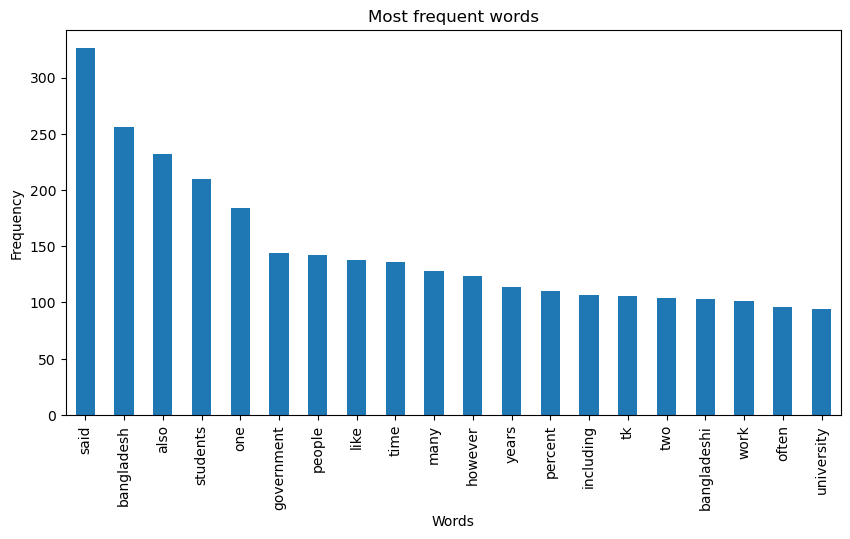

In [18]:
df['body'] = df['body'].apply(lambda x: remove_links(x))
df['body'] = df['body'].apply(lambda x: remove_html(x))
df['body'] = df['body'].apply(lambda x: remove_newline(x))
df['body'] = df['body'].apply(lambda x: remove_non_ascii(x))
df['body'] = df['body'].apply(lambda x: remove_numbers(x))
df['body'] = df['body'].apply(lambda x: remove_single_char(x))
df['body'] = df['body'].apply(lambda x: remove_extra_space(x))
df['body'] = df['body'].apply(lambda x: remove_punctuation(x))
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))
df['body'] = df['body'].apply(lambda x: x.lower())
words = df['body'].str.split(expand=True).unstack().value_counts()



# most frequent words statistics plot
import matplotlib.pyplot as plt
words.describe()

plt.figure(figsize=(10,5))
words[:20].plot(kind='bar')
plt.title('Most frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



